# Parte I

 <li>¿Por qué una matriz equivale a una transformación lineal entre espacios vectoriales?
 
R= Por que una matriz A al multiplicar a un vector X lo transforma en el vector b (Ax = b). Convierte vectores en vectores.


 <li>¿Cuál es el efecto de transformación lineal de una matriz diagonal y el de una matriz ortogonal?</li>
     
R= El efecto de transformación lineal de una matriz diagonal equivale a multiplicar la matriz X por un escar. Las matrices ortonormales preservan la norma y el volumen de los vectores.
 

<li>¿Qué es la descomposición en valores singulares de una matriz?</li>

R= Es representar una matriz como producto de tres matices, las cuales se pueden interpretar como transformaciones geométricas: una rotción, un escalamiento o redimensión y otra rotación. En otras palabras, nos dice que toda transformación lineal es una rotación, redimensión de ejes canónicos y otra rotación.
    

<li>¿Qué es diagonalizar una matriz y que representan los eigenvectores?</li>
 
 R= Diagonalizar una matriz es representarla como una multiplición de 3 matirces ($W, D, W^{t}$) donde W es ortogonal y D diagonal. Esto nos sirve para encontrar la base de eigenvectores. Los eigenvectores representan dirección (ejes) dentro de una transformación lineal, la cual es un reescalamiento o rotación. Por lo tanto al no repsentar un cambio de sentido, representan un reescalamiento.


<li>¿Intuitivamente qué son los eigenvectores?</li>

 R = Son valores que reescalan dentro de una transformación lineal. Un eigenvector de valor de valor 1, por ejemplo, va a mantener el tamaño en la transformación. 

<li>¿Cómo interpretas la descomposición en valores singulares como una composición de tres tipos de transformaciones
            lineales simples?</li>
            
R = Toda transformación lineal es una rotación, redimensión de ejes canónicos y otra rotación. Por lo que la primera matriz se encarga de hacer una rotación, la segunda matriz (diagonal) contiene a los eigenvectores por lo que se encarga de hacer una redimensión de los ejes canónicos, y la tercera matriz se encarda de dar una última rotación.
 

<li>¿Qué relación hay entre la descomposición en valores singulares y la diagonalización?</li>

 R= que ambos sirven para representar una matriz con el producto de 3 matrices. Donde la segunda matriz es diagonal y contiene eigenvectores.

<li>¿Cómo se usa la descomposición en valores singulares para dar un aproximación de rango menor a una matriz?</li>
 
 R= Al hacer la descomposición, tenemos la matriz diagonal con los eigenvectores acomodados en columnas de mayor a menor importancia, por lo que basta tomar solo un número menor de esas columnas y renglones de las otras matrices para tener una aproximación a la matriz original. 

<li>Describe el método de minimización por descenso gradiente</li>

R= En este método sirve para encontrar el valor mínimo de un función (un valor x que minimice la función F(x)). El método lo que nos dice es que tomemos un punto cualquiera $x_{0}$ de la función, luego para iniciar la busqueda de un valor que minimice la función ($x_{1}$) vamos a restarle a $x_{0}$ alpha veces el gradiente de F(x) (recordemos que el gradiente apunta al máximo ascenso por lo que el gradiente negativo apunta al máximo descenso), alpha nos indica la magnitud del siguiente paso, por lo que si es muy chica el proceso se puede volver muy tardado, pero si es muy grande el algoritmo diverge. Conforme nos vamos acercando al valor mínimo, el gradiente se va volviendo más pequeño y nuestros valores $ x_{t}$ y $x_{t+1}$ se van acercando más y más, por lo que el proceso termina cuando $x_{t} = x_{t+1}$ o la diferencia entre ambos es un valor muy pequeño previamente fijado. La formula de este proceso es: $x_{t+1}=x_{t} - \alpha \nabla F(x_{t})$

 <li>Menciona 4 ejemplo de problemas de optimización (dos con restricciones y dos sin restricciones) que te parecan interesantes como Científico de Datos</li>
 
1) Asignción de tripulación en la industria aérea (Crew Scheduling Problem).- El objetivo es  asignar la tripulación a todos los vuelos sin incurrir en diferentes restricciones que se tienen a nivel persona (máximo en horas de trabajo, número de días fuera de base, etc.) al menor costo posible. Por lo regular este costo es el primero o segundo mayor para una aerolínea.

2) En el sector agricultor, maximizar las ganancias determinando cuanto sembrar de cada cultivo para satisfacer cierto pronóstico de demanda.

3) Determinar cuanto dinero poner en cada cajero de cierta ciudad y cada cuanto resurtirlo para dar un nivel correcto de servicio sin tener que tener parado mucho dinero.

4) En la industria de acero, reducir el desperdicio generado por cortar placas grandes en piezas más pequeñas, determinando patrones de corte.
 

# Parte II

# Ejercicio 1: Script para aproximar una imagen

Vamos a aproximar una imagen blanco y negro utilizando la descomposición SVD.

Introducir el path del archivo: ImagenTarea2.png
Grado de aproximación k: 10


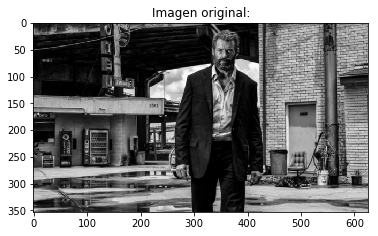

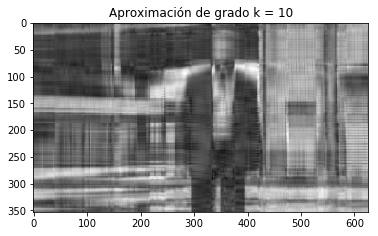

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

#Pedir el path del archivo
IM=input("Introducir el path del archivo: ")

#Pedir el grado de aproximación k
k=input("Grado de aproximación k: ")
k=int(k)

#Ejemplo de la imagen que usé
#IM = "ImagenTarea2.png"

img = Image.open(IM) 
imgmat = np.array(list(img.getdata(band=0)), float) #Hago un array con la informacion de los pixeles
imgmat.shape = (img.size[1], img.size[0]) #Redimenciono el array en base al numero de pixeles
imgmat = np.matrix(imgmat) #Convierto el array en matriz
plt.imshow(imgmat, cmap='gray'); #Para visualizar la imagen usando  matplotlib
title = "Imagen original:"
plt.title(title)
plt.show()

U, S, V = np.linalg.svd(imgmat) #Descomposicion svd

matreconstruida = np.matrix(U[:, :k]) * np.diag(S[:k]) * np.matrix(V[:k, :])
plt.imshow(matreconstruida, cmap='gray')
title = "Aproximación de grado k = %s" % k
plt.title(title)
plt.show()

Ahora vamos a elegir diferentes grados de aproximación a la imagen original usando un ciclo "For":

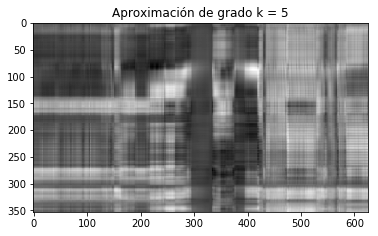

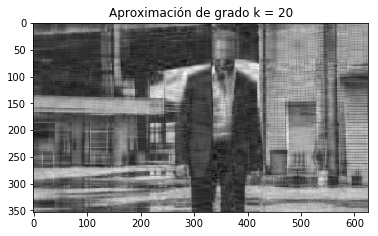

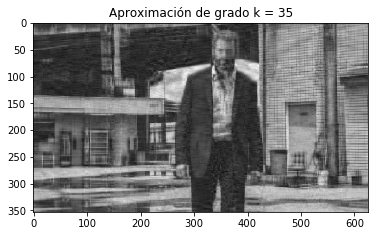

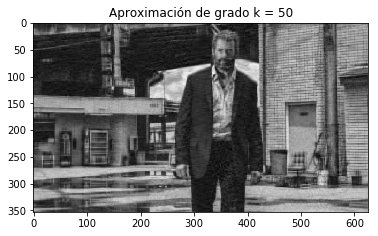

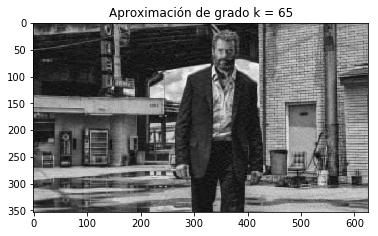

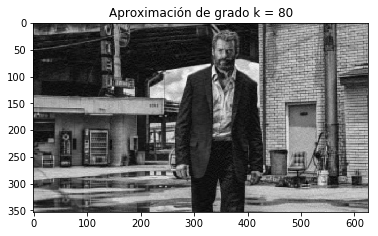

In [77]:
for i in range(5, 85, 15):
    matreconstruida = np.matrix(U[:, :i]) * np.diag(S[:i]) * np.matrix(V[:i, :])
    plt.imshow(matreconstruida, cmap='gray')
    title = "Aproximación de grado k = %s" % i
    plt.title(title)
    plt.show()

### ¿Qué tiene que ver este proyecto con compresión de imágenes?

R= Al descomponer la imagen nos estamos quedando únicamente con información relevante de la misma, por lo que podemos reconstruirla posteriormente utilizando únicamente un porcentaje de los vectores de U, Sigma y V, dependiendo de la fidelidad de la imagen que queramos. Como se puede observar en el ejercicio, con un porcentaje bajo de vectores podemos reconstruir la imagen sin alterar mucho su fidelidad, por lo que en lugar de guardar toda la matriz, basta con guardar ese porcentaje de vectores y así ahorrar memoria.


# Ejercicio 2: Cálculo de pseudoinversa y resoluver sistemas de ecuaciones

Programar una función que dada cualquier matriz devuelva la pseudoinversa usando la descomposición SVD. Hacer otra función que resuelva un sistema de ecuaciones de la forma Ax=b usando la pseudoinversa.

In [669]:
from copy import copy, deepcopy

def pseudoinversa(A):
    U, S, V = np.linalg.svd(A)
    
    m, n = A.shape

    D = np.empty([m,n])
    
    D = D * 0
    
    for k in range (n):
        D[k,k] = 1
    
    S = D * S # Vuelvo a S una matriz diagonal mXn
    
    pseudo = deepcopy(S)
    
    for i in range (n):  #Calculo pseudo inversa de sigma
        if pseudo[i,i] != 0:
            pseudo[i,i] = 1/pseudo[i,i]
    
    pseudo = pseudo.transpose()
    VT = V.transpose()
    UT = U.transpose()
    
    w = np.dot(VT,pseudo)
    pseudo = np.dot(w,UT)
    
    return pseudo
    
    
def resuelve(A,b):
    y= pseudoinversa(A)
    x = np.dot(y,b)
    return x

Ejemplo para ver que la función resuelve de manera correcta el sistema de ecuaciones:

In [670]:
A = np.array([[2, 1, 3], [4, -1, 3], [-2, 5, 5]])
b = np.array([[17],[31],[-5]])

In [671]:
resuelve(A,b)

array([[ 5.],
       [-2.],
       [ 3.]])

Jugar con la función donde b puede tomar distintos valores y A=[[1,1],[0,0]]:

In [672]:
A = np.array([[1,1],[0,0]])
b= np.array([[5],[0]])

In [674]:
resuelve(A,b)

array([[ 2.5],
       [ 2.5]])

a) Si b esta en la imagen de A (La imagen es [x,0]) devuelve la solución al sistema de manera correcta. Si b no esta en la imagen (ej. b= [1,1]) devuelve la solución al sistema considerando la imagen, que es la solución más cercana, en el ejemplo b=[1,1] devuelve la solución al sistema considerando b=[1,0].

b) ¿La solución resultante es única? No, ya que para diferentes valore de b, existe el mismo valor de x. Esto sucede porque la matriz es singular.

c) Cambiar a: A=[[1,1],[0,1e-32]]. ¿La solución es única? Sí, para cada diferente valor de b1 y b2, devuelve un valor único de x1 y x2.  ¿Cambia el valor devuelto de x en cada posible valor de b del punto anterior? sí, debido a que esta matriz si es invertible con el metodo de la pseudoinversa, aunque prácticamente sea la misma matriz que en el punto anterior.

In [675]:
A = np.array([[1,1],[0,1e-32]])
b= np.array([[5],[0]])

In [676]:
resuelve(A,b)

array([[  5.00000000e+00],
       [ -5.55111512e-16]])

# Ejercicio 3: Ajuste de mínimos cuadrados

In [303]:
import pandas as pd

z = pd.read_csv("https://raw.githubusercontent.com/mauriciogtec/PropedeuticoDataScience2017/master/Tarea/study_vs_sat.csv",index_col = False)


In [328]:
m, n = z.shape

SX= z.iloc[0][0]
SY = z.iloc[0][1]
SXX = z.iloc[0][0] **2
SYY = z.iloc[0][1] **2
SXY = z.iloc[0][0] * z.iloc[0][1]


for i in range (1,m):
    SX += z.iloc[i][0]
    SY += z.iloc[i][1]
    SXX += z.iloc[i][0] **2
    SYY += z.iloc[i][1] **2
    SXY += z.iloc[i][0] * z.iloc[i][1]

Beta = (m*SXY - SX*SY) / (m*SXX- SX**2)
Alpha = (1/m)*SY - Beta*(1/m)*SX

funcion= "Sat_score ~ " + str(Alpha) + " + " + str(Beta) + "Study_hours"
print(z,"\n ","\n ",funcion) 

    study_hours  sat_score
0             4        390
1             9        580
2            10        650
3            14        730
4             4        410
5             7        530
6            12        600
7            22        790
8             1        350
9             3        400
10            8        590
11           11        640
12            5        450
13            6        520
14           10        690
15           11        690
16           16        770
17           13        700
18           13        730
19           10        640 
  
  Sat_score ~ 353.164879499 + 25.3264677779Study_hours


<li> ¿Cuál es el gradiente de la función que se quiere optimizar? R= El Vector [1, Study_hours]

Programar una función que reciba los valores alpha, beta y el vector Study_hours y devuelva un vector array de numpy de predicciones alpha + beta * Study_hours_i, con un vaor por cada individuo.

In [537]:
def sat_score(Alpha,Beta,Study_hours):
    m, = Study_hours.shape
    
    Satscore= [0]
    for i in range (m-1):
        Satscore += [0]
    Satscore = np.array([Satscore])
    Satscore= Satscore.transpose()
    
    for j in range (m):
        Satscore[j,0]= Alpha + Beta * Study_hours[j]
    
    return Satscore
        

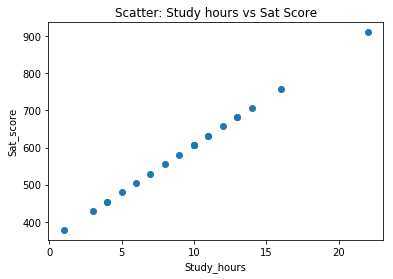

array([[454],
       [581],
       [606],
       [707],
       [454],
       [530],
       [657],
       [910],
       [378],
       [429],
       [555],
       [631],
       [479],
       [505],
       [606],
       [631],
       [758],
       [682],
       [682],
       [606]])

In [604]:
SH= z.iloc[:,0]
sat_s = sat_score(353.164879499,25.3264677779,SH)

plt.scatter(SH, sat_s)
plt.title('Scatter: Study hours vs Sat Score')
plt.xlabel('Study_hours')
plt.ylabel('Sat_score')
plt.show()

sat_s

<li><strong>(Avanzado)</strong> Usen la libreria <code>matplotlib</code> par visualizar las predicciones  con alpha y beta solución contra los valores reales de sat_score.

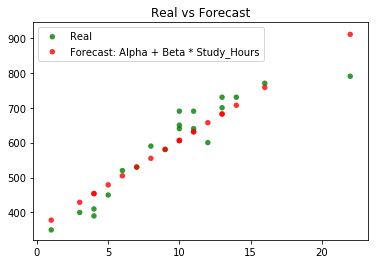

In [635]:
SS= z.iloc[:,1]
g1 = (SH,SS)
g2 = (SH,sat_s)

 
data = (g1, g2)
colors = ("green", "red")
groups = ("Real", "Forecast: Alpha + Beta * Study_Hours") 

fig, ax = plt.subplots()
for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
    
plt.title('Real vs Forecast')
plt.legend(loc=0)
plt.show()



<li> Definan un numpy array X de dos columnas, la primera con unos en todas sus entradas y la segunda y la segunda con la variable Study_hours. Observen que <code>X*[alpha,beta]</code> nos devuelve <code>alpha + beta*study_hours_i</code> en cada entrada y que entonces el problema se vuelve <code>sat_score ~ X*[alpha,beta]</code>


In [643]:
x=[1.]
y= [z.iloc[0,0]]
for i in range (19):
    x += [1]
    y += [z.iloc[i+1,0]]

X = np.array([x,y])
X = X.transpose()

alpha = 353.164879499
beta = 25.3264677779
ab=np.array([[alpha],[beta]])
R = np.dot(X,ab)
R

            

array([[ 454.47075061],
       [ 581.1030895 ],
       [ 606.42955728],
       [ 707.73542839],
       [ 454.47075061],
       [ 530.45015394],
       [ 657.08249283],
       [ 910.34717061],
       [ 378.49134728],
       [ 429.14428283],
       [ 555.77662172],
       [ 631.75602506],
       [ 479.79721839],
       [ 505.12368617],
       [ 606.42955728],
       [ 631.75602506],
       [ 758.38836395],
       [ 682.40896061],
       [ 682.40896061],
       [ 606.42955728]])

<li>Calculen la pseudoinversa  X^+ de X y computen <code>(X^+)*sat_score</code> para obtener alpha y beta soluciones.</li> 


In [677]:
Xpseudo= pseudoinversa(X)
Sscore= z.iloc[:,1]

ab=np.dot(Xpseudo,Sscore)
ab

array([ 353.1648795 ,   25.32646778])

<li>Comparen la solución anterior con la de la fórmula directa de solución exacta <code>(alpha,beta)=(X^t*X)^(-1)*X^t*study_hours</code>.</li>

In [597]:
SH= z.iloc[:,0]
Sscore= z.iloc[:,1]
XT = X.transpose()
XT2 = np.dot(XT,X)
XTI = np.linalg.inv(XT2)

w= np.dot(XTI,XT)
ab = np.dot(w,Sscore)
ab


array([ 353.1648795 ,   25.32646778])

La solución es la misma con ambos métodos